In [1]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sp500_all_5y.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [3]:
df

,Ticker,Date,Open,High,Low,Close,Volume
0,MMM,2015-11-16,134.812716,137.108538,134.812716,137.065231,2395000.0
1,MMM,2015-11-17,137.195155,137.342432,135.601074,136.042908,2393000.0
2,MMM,2015-11-18,136.195540,137.346642,136.108344,137.250717,2226900.0
3,MMM,2015-11-19,137.459997,138.227385,136.657720,138.114029,1518200.0
4,MMM,2015-11-20,138.375644,139.387216,138.079153,138.611099,1891100.0
...,...,...,...,...,...,...,...
623239,ZTS,2020-11-09,175.460007,176.410004,165.009995,165.199997,2325300.0
623240,ZTS,2020-11-10,166.039993,166.960007,160.490005,162.559998,2926600.0
623241,ZTS,2020-11-11,164.990005,165.919998,163.330002,164.949997,1570200.0
623242,ZTS,2020-11-12,164.160004,166.600006,163.789993,165.190002,1182800.0


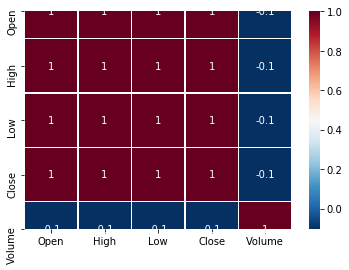

In [4]:
# Correlation
corr = df.corr(method='pearson')

import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

In [5]:
def stock_hist(df,ticker):
    stock = df[df['Ticker']== ticker]
    stock = stock.reset_index()
    stock = stock.drop(columns = "index")
    return stock

In [6]:
apple = stock_hist(df,"AAPL")
apple

,Ticker,Date,Open,High,Low,Close,Volume
0,AAPL,2015-11-16,25.588095,26.245143,25.500796,26.231359,152426800.0
1,AAPL,2015-11-17,26.401363,26.431230,26.033784,26.118788,110467600.0
2,AAPL,2015-11-18,26.594344,26.991788,26.534612,26.945841,186698800.0
3,AAPL,2015-11-19,27.026249,27.510994,26.824081,27.288149,173183200.0
4,AAPL,2015-11-20,27.384641,27.550051,27.304233,27.407616,137148400.0
...,...,...,...,...,...,...,...
1254,AAPL,2020-11-09,120.500000,121.989998,116.050003,116.320000,154515300.0
1255,AAPL,2020-11-10,115.550003,117.589996,114.129997,115.970001,138023400.0
1256,AAPL,2020-11-11,117.190002,119.629997,116.440002,119.489998,112295000.0
1257,AAPL,2020-11-12,119.620003,120.529999,118.570000,119.209999,103162300.0


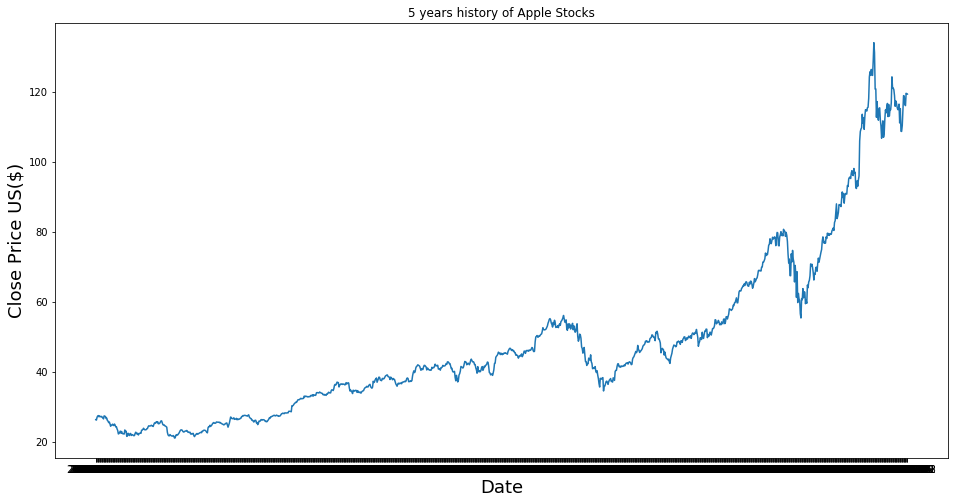

In [7]:
plt.figure(figsize=(16,8))
plt.title('5 years history of Apple Stocks')
plt.plot(apple['Date'],apple['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
def split_data(stock):
    X = np.array(stock[['Open','High','Low']])
    y = np.array(stock['Close'])
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return x_train, x_test, y_train, y_test

In [9]:
x_train, x_test, y_train, y_test = split_data(apple)

#### Linear Regression

In [10]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_lr_pred = lr_model.predict(x_test)

##### Linear Model Cross-Validation

In [12]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.89722987041505


In [13]:
# #### Plot Actual vs Predicted Value
# plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
# plot_df.head(20).plot(kind='bar',figsize=(16,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

#### KNN model

In [14]:
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

##### knn cross-validation

In [15]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.78462150539589


In [ ]:
# #### Plot Actual vs Predicted
# plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
# plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
# plt.grid(which='major', linestyle='-', linewidth=0.5, color='green')
# plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
# plt.show()

#### SVM

In [16]:
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

#### Random Forest Regression

In [17]:
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
y_rf_pred=rf_model.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
op = []
high = []
low = []
close = []

for i in range(len(x_test)):
    op.append(x_test[i][0])
    high.append(x_test[i][1])
    low.append(x_test[i][2])

,index,Open,High,Low,Close,y_svm_pred,y_lr_pred,y_knn_pred,y_rf_pred


In [48]:
prediction_table = pd.DataFrame(columns = ['Open','High','Low','Close','y_svm_pred','y_lr_pred','y_knn_pred','y_rf_pred'])
prediction_table['Open'] = op
prediction_table['High'] = high
prediction_table['Low'] = low
prediction_table['Close'] = y_test
prediction_table['y_svm_pred'] = y_svm_pred
prediction_table['y_lr_pred'] = y_lr_pred
prediction_table['y_knn_pred'] = y_knn_pred
prediction_table['y_rf_pred'] = y_rf_pred

In [50]:
prediction_table.head()

,Open,High,Low,Close,y_svm_pred,y_lr_pred,y_knn_pred,y_rf_pred
0,61.789882,62.967818,61.459663,62.792850,62.532985,62.490342,62.703966,62.799457
1,41.771295,41.778453,41.363245,41.542213,41.466910,41.483778,41.548848,41.655335
2,74.823270,76.704125,74.788390,76.656792,76.416252,76.336720,76.466238,76.157471
3,53.049677,53.911353,52.844519,53.257252,53.631347,53.599819,53.560405,53.182911
4,47.778421,48.705188,47.758961,48.673569,48.564439,48.520998,48.401537,48.524260


#### Error Measure: RMSE, R2, Confidence

In [18]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [20]:
lr_mse = math.sqrt(mean_squared_error(y_test,y_lr_pred))
knn_mse = math.sqrt(mean_squared_error(y_test,y_knn_pred))
svm_mse = math.sqrt(mean_squared_error(y_test,y_svm_pred))
rf_mse = math.sqrt(mean_squared_error(y_test,y_rf_pred))
print('Linear Model Root mean square error:',lr_mse)
print('KNN Model Root mean square error:',knn_mse)
print('SVM Model Root mean square error:',svm_mse)
print('Random Forest Model Root mean square error:',rf_mse)

Linear Model Root mean square error: 0.6019393659720987
KNN Model Root mean square error: 0.7153927797711993
SVM Model Root mean square error: 0.6034684781299735
Random Forest Model Root mean square error: 0.7209549599315264


In [21]:
print('Linear R2:',r2_score(y_test, y_lr_pred))
print('KNN R2:',r2_score(y_test, y_knn_pred))
print('SVM R2:',r2_score(y_test, y_svm_pred))
print('Random Forest R2:',r2_score(y_test, y_rf_pred))

Linear R2: 0.9993177994507717
KNN R2: 0.9990364024723973
SVM R2: 0.9993143290476416
Random Forest R2: 0.9990213602772475


In [22]:
lr_confidence = lr_model.score(x_test, y_test)
knn_confidence = knn_model.score(x_test, y_test)
svm_confidence = svm_model.score(x_test, y_test)
rf_confidence = rf_model.score(x_test, y_test)
print("linear regression confidence: ", lr_confidence)
print("knn confidence: ", knn_confidence)
print("svm confidence: ", svm_confidence)
print("random forest confidence: ", rf_confidence)

linear regression confidence:  0.9993177994507716
knn confidence:  0.9990364024723974
svm confidence:  0.9993143290476416
random forest confidence:  0.9990213602772476


#### reference
1. https://towardsai.net/p/machine-learning/netflix-stock-prediction-model-a-comparative-study-of-linear-regression-k-nearest-neighbor-knn-4527ff17939b
2. https://towardsdatascience.com/an-introduction-to-random-forest-using-tesla-stock-prices-d9c6e113be3c
3. https://randerson112358.medium.com/predict-stock-prices-using-python-machine-learning-53aa024da20a